In [1]:
# Import basic libraries for data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load the sales dataset
# encoding is used because the file contains special characters
df = pd.read_csv("Sample - Superstore.csv", encoding="latin1")

# View first few rows to understand the data
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# Convert Order Date column into datetime format
# This helps in extracting year, month, and day later
df["Order Date"] = pd.to_datetime(df["Order Date"])

# Remove duplicate rows to avoid repeated data
df.drop_duplicates(inplace=True)

# Check if there are any missing values
df.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [4]:
# Feature engineering from date column
# ML models cannot understand dates directly
df["Year"] = df["Order Date"].dt.year
df["Month"] = df["Order Date"].dt.month
df["Day"] = df["Order Date"].dt.day


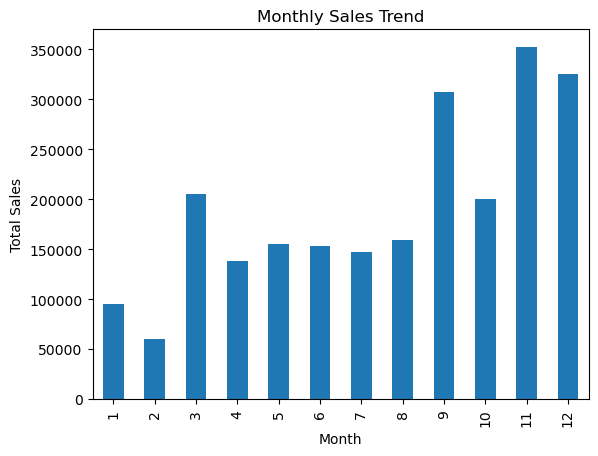

In [5]:
# Perform basic EDA to understand monthly sales trend
monthly_sales = df.groupby("Month")["Sales"].sum()

# Plot monthly sales
plt.figure()
monthly_sales.plot(kind="bar")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


In [6]:
# Select input features (X) and target variable (y)
# Sales is the value we want to predict
X = df[["Year", "Month", "Day", "Quantity", "Discount", "Profit"]]
y = df["Sales"]


In [7]:
# Split data into training and testing sets
# 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
# Scale the numerical features
# Scaling helps the model learn better
scaler = StandardScaler()

# Fit scaler only on training data to avoid data leakage
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
# Predict sales on test data
y_pred = model.predict(X_test)

# Evaluate the model using RMSE and R2 score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)


RMSE: 824.9378501614874
R2 Score: -0.15206267331830836


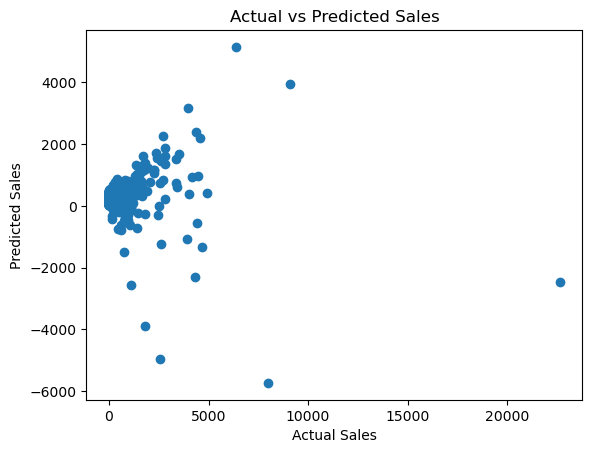

In [11]:
# Visualize actual vs predicted sales
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()
